In [58]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
# Step 1: Process the data into dataframes
data = pd.read_csv("data/Salary_Data[1].csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [60]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [61]:
data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [62]:
# Replacing educational level values with numerical values
# Phd : 4, Masters: 3, Bachelor's : 2 and High School: 1
data = data.replace(to_replace=["PhD","phD", "Master's Degree", "Master's","Bachelor's Degree","Bachelor's","High School"], value=[4,4,3,3,2,2,1])

/tmp/ipykernel_4010/3976292554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(to_replace=["PhD","phD", "Master's Degree", "Master's","Bachelor's Degree","Bachelor's","High School"], value=[4,4,3,3,2,2,1])


In [63]:
# Replacing : Male --> 0 and Female --> 1
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})

data["Gender"]
# now we have more number of useful columns which can be helpful for our regression purpose.

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
6699    1.0
6700    0.0
6701    1.0
6702    0.0
6703    1.0
Name: Gender, Length: 6704, dtype: float64

In [64]:
# Step 2: Filter Relevant Columns

data_filtered = data[['Years of Experience', 'Salary']].dropna()

x = data_filtered['Years of Experience'].values
y = data_filtered['Salary'].values


In [65]:
# Step 3: Function to Calculate Regression Parameters
def calculate_regression(X, Y):
    """
    Calculate the slope (m) and intercept (c) for linear regression.
    """
    #calculate mean of x & y using an inbuilt numpy method mean()
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    # total no.of input values
    m = len(X)

    # using the formula to calculate m & c
    num = 0
    den = 0

    for i in range(m):
        num += (X[i] - mean_x) * (Y[i] - mean_y)
        den += (X[i] - mean_x) ** 2

    m = num / den
    c = mean_y - (m * mean_x)

    return m, c

In [66]:
# Calculate parameters
m, c = calculate_regression(x, y)

print("Slope : ",m)
print("intercept : ",c)


# Step 4: Predict Function
def predict(x_value):
    """Predict y (Salary) based on x (Years of Experience)"""

    return m * x_value + c

# Step 5: Evaluate Model's accuracy using Mean Squared Error 
predicted_y = predict(x)
rmse = np.sqrt(np.mean((y - predicted_y) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Slope :  7046.768344026587
intercept :  58283.27509418632
Root Mean Squared Error (RMSE): 31028.115342036675


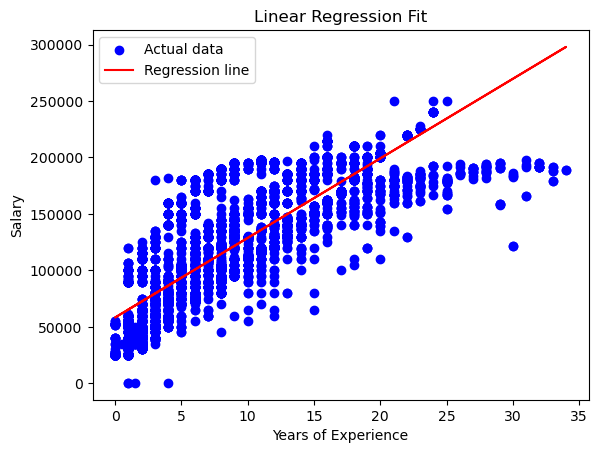

In [67]:
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, predict(x), color="red", label="Regression line")
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.show()


In [68]:
# Making X_train matrix for implementing multi variable linear regression
data['dummy']= 1
X_train = data[["dummy","Age","Gender","Education Level", "Years of Experience"]]
Y_train = data["Salary"]

# for performing linear algebra calculations
# convert data into Numpy arrays

X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)

In [69]:
print(np.isnan(X_train_array).any())  # Check for NaN in X_train_array
print(np.isnan(Y_train_array).any())  # Check for NaN in Y_train_array
X_train_array = np.nan_to_num(X_train_array)
Y_train_array = np.nan_to_num(Y_train_array)


True
True


In [70]:
betas = np.linalg.inv(np.dot(X_train_array.T,X_train_array)).dot(X_train_array.T).dot(Y_train_array)
betas

array([83080.8420539 , -2126.58353766, -6769.77062864, 15605.39634903,
        8134.96109547])

In [71]:
Y_test = np.dot(X_train_array,betas)
Y_test

array([ 86915.76702422,  87987.80470431, 171830.58468738, ...,
        76264.20237543, 145963.64370522,  44760.25689064])

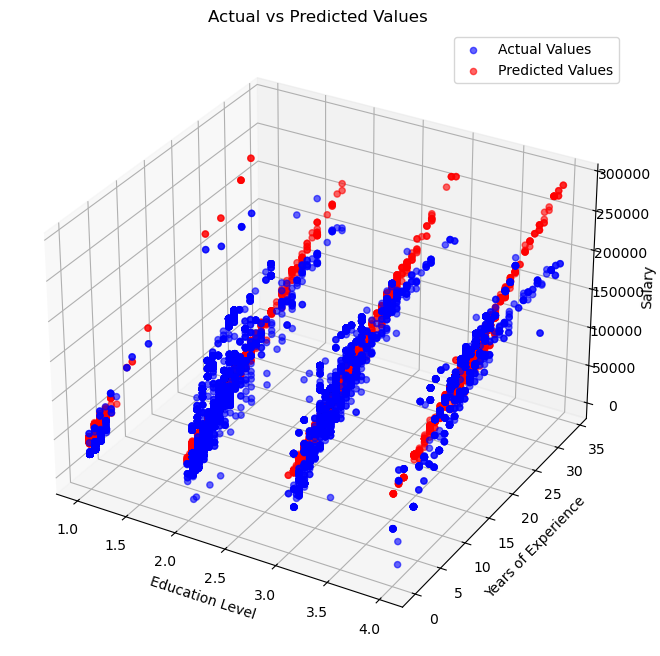

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select two features for 3D visualization (e.g., "Education Level" and "Years of Experience")
feature1 = X_train["Education Level"]
feature2 = X_train["Years of Experience"]
predicted = Y_test

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual Y values
ax.scatter(feature1, feature2, Y_train_array, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted Y values
ax.scatter(feature1, feature2, predicted, color='red', alpha=0.6, label="Predicted Values")

# Add labels and title
ax.set_xlabel("Education Level")
ax.set_ylabel("Years of Experience")
ax.set_zlabel("Salary")
ax.set_title("Actual vs Predicted Values")
ax.legend()

# Show the plot
plt.show()


In [73]:
df = pd.read_csv("data/Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


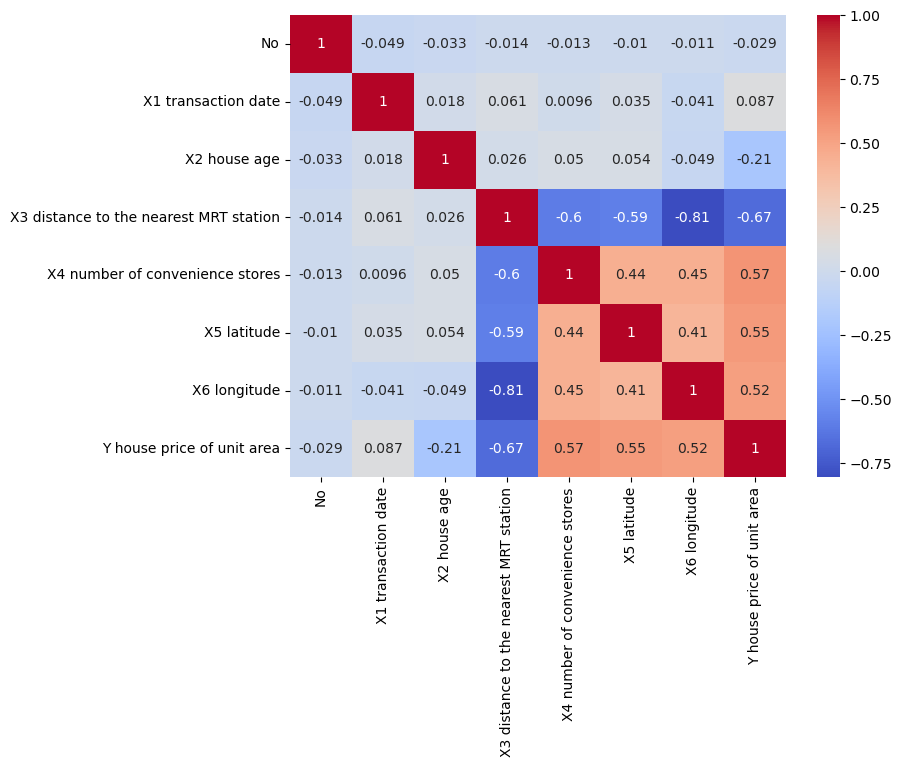

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

X3 distance to the nearest MRT station (-0.67 correlation) → Strong negative correlation.

X4 number of convenience stores (0.57 correlation) → Positive correlation.

X5 latitude (0.55 correlation) → Positive correlation.

X6 longitude (0.52 correlation) → Positive correlation.

In [75]:
# Selecting relevant features based on correlation
selected_columns = [
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude",
    "Y house price of unit area"  # Target variable
]

# Creating a new filtered DataFrame
df_filtered = df[selected_columns]

# Save the filtered dataset
df_filtered.to_csv("filtered_real_estate_data.csv", index=False)

# Display the first few rows of the filtered dataset
df_filtered

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...
409,4082.01500,0,24.94155,121.50381,15.4
410,90.45606,9,24.97433,121.54310,50.0
411,390.96960,7,24.97923,121.53986,40.6
412,104.81010,5,24.96674,121.54067,52.5


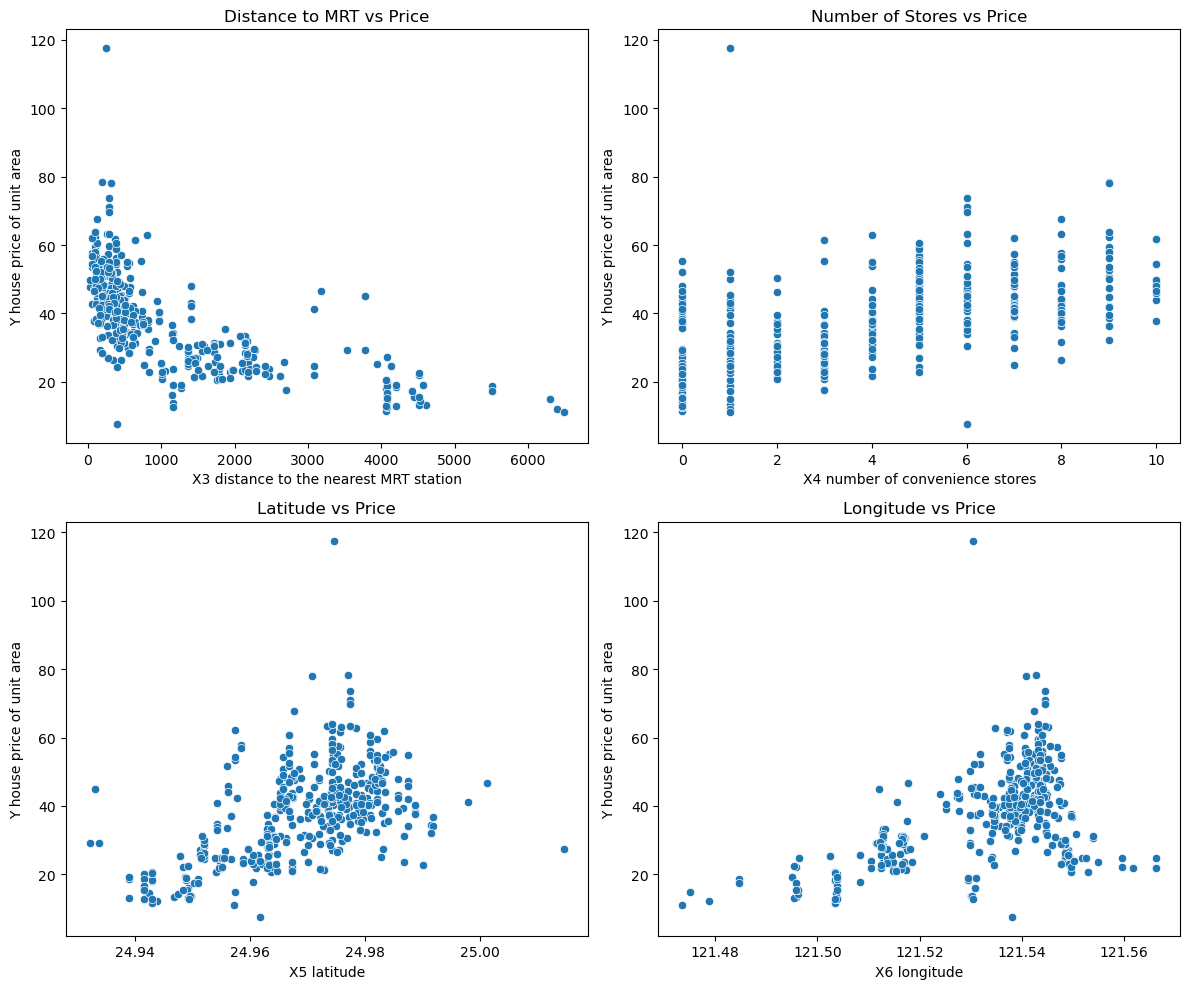

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=df_filtered["X3 distance to the nearest MRT station"], y=df_filtered["Y house price of unit area"], ax=axes[0, 0])
axes[0, 0].set_title("Distance to MRT vs Price")

sns.scatterplot(x=df_filtered["X4 number of convenience stores"], y=df_filtered["Y house price of unit area"], ax=axes[0, 1])
axes[0, 1].set_title("Number of Stores vs Price")

sns.scatterplot(x=df_filtered["X5 latitude"], y=df_filtered["Y house price of unit area"], ax=axes[1, 0])
axes[1, 0].set_title("Latitude vs Price")

sns.scatterplot(x=df_filtered["X6 longitude"], y=df_filtered["Y house price of unit area"], ax=axes[1, 1])
axes[1, 1].set_title("Longitude vs Price")

plt.tight_layout()
plt.show()


In [77]:
x = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']].values  
y = df['Y house price of unit area'].values.reshape(-1, 1)  

In [78]:
def polynomial_features(X, degree):
    """Creates a polynomial feature matrix including bias term."""

    X_poly = np.ones((X.shape[0], 1))  # Bias term (Intercept)
    
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d)) 

    return X_poly

In [79]:
def train_polynomial_regression(X, y, degree):
    """Computes weight matrix using the Equation: w = (X^T X)^-1 X^T y"""

    X_poly = polynomial_features(X, degree)
    weights = np.dot(np.linalg.inv(np.dot(X_poly.T, X_poly)), np.dot(X_poly.T, y)) #w = (X^T X)^-1 X^T y

    
    return weights

In [80]:
def predict(X, weights, degree):
    """Predicts values using the dot product of polynomial features and weights."""

    X_poly = polynomial_features(X, degree)

    return np.dot(X_poly, weights) 

In [81]:
w = train_polynomial_regression(x, y, 2)

y_cap = predict(x, w, 2)

Mean Squared Error (MSE): 72.0338
R² Score: 0.6100


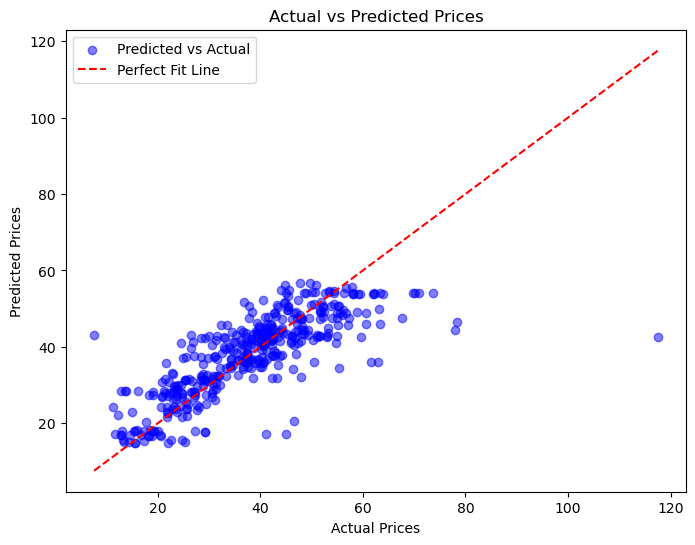

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Mean Squared Error (MSE)
mse = np.mean((y - y_cap) ** 2)

# R² Score
ss_total = np.sum((y - np.mean(y)) ** 2) 
ss_residual = np.sum((y - y_cap) ** 2)  
r2_score = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2_score:.4f}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y, y_cap, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', label="Perfect Fit Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()


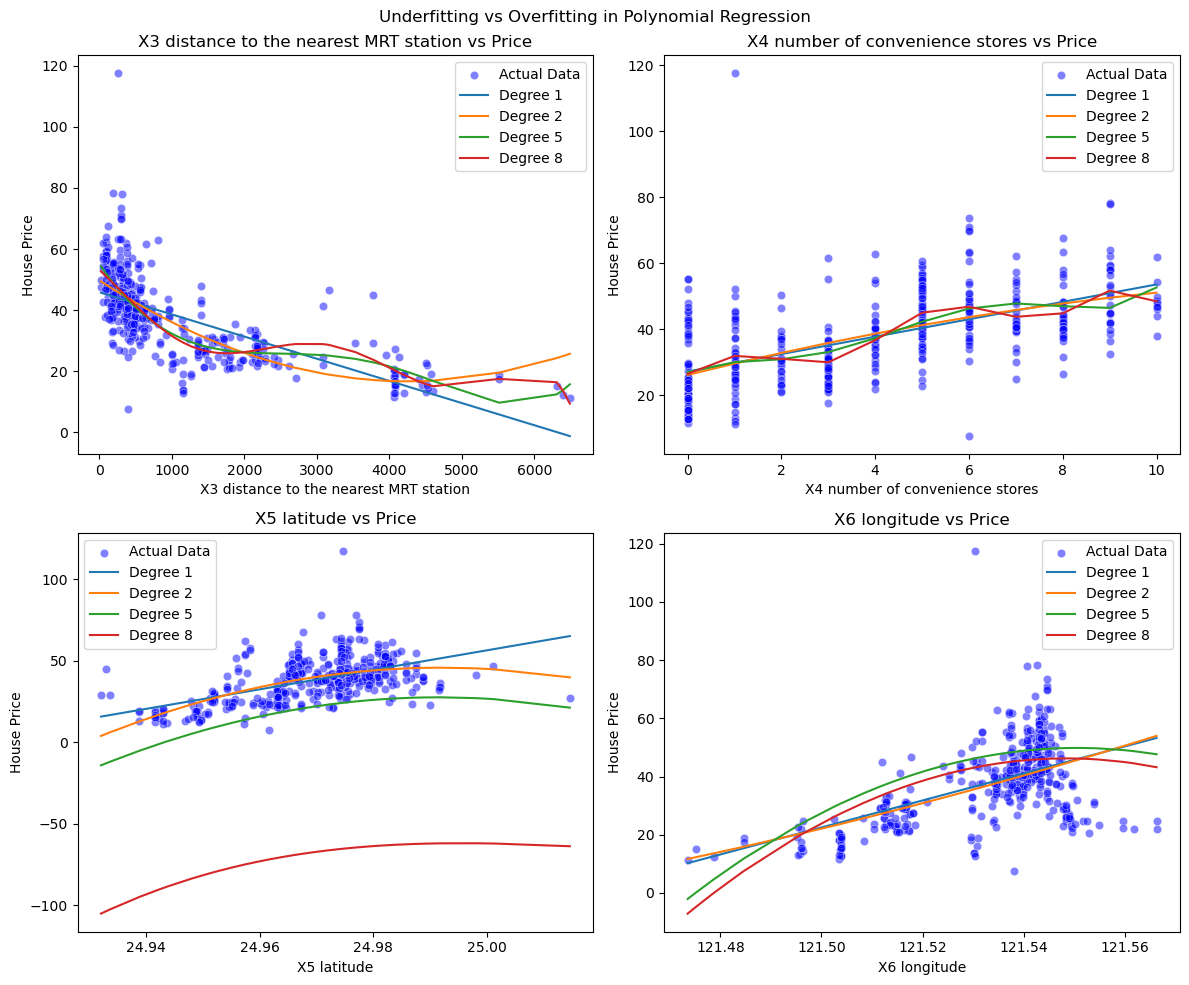

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

degrees = [1, 2, 5, 8]  # Trying different polynomial degrees

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Features to visualize
features = ["X3 distance to the nearest MRT station", 
            "X4 number of convenience stores", 
            "X5 latitude", 
            "X6 longitude"]

for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # Get subplot position
    X_feature = df_filtered[[feature]].values  # Extract feature
    y_actual = df_filtered["Y house price of unit area"].values.reshape(-1, 1)

    sns.scatterplot(x=X_feature.flatten(), y=y_actual.flatten(), ax=axes[row, col], color="blue", alpha=0.5, label="Actual Data")

    for d in degrees:
        # Generate Polynomial Features
        X_poly = polynomial_features(X_feature, d)  # Convert to polynomial features
        weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_actual  # Normal Equation
        y_pred = X_poly @ weights  # Predictions

        # Sort for smoother curve
        sorted_idx = np.argsort(X_feature.flatten())
        axes[row, col].plot(X_feature[sorted_idx], y_pred[sorted_idx], label=f"Degree {d}")

    axes[row, col].set_title(f"{feature} vs Price")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("House Price")
    axes[row, col].legend()

plt.suptitle("Underfitting vs Overfitting in Polynomial Regression")
plt.tight_layout()
plt.show()
